In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle

%matplotlib inline

In [9]:
print('Running on tensorflow version: ', tf.__version__)

Running on tensorflow version:  1.9.0


In [13]:
'''From https://www.cs.toronto.edu/~kriz/cifar.html'''
def unpickle(file):
#     import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [14]:
# set directory of the pickled batch files
dir_prefix = './cifar-10-batches-py/'

In [15]:
def load_data(file_name):
    return unpickle(dir_prefix + file_name)

In [101]:
def process_batch(batch_np_array):
    num_instance = batch_np_array.shape[0]
    batch_reshape = batch_np_array.reshape(num_instance, 3, 1024)
    # transposes the 2nd and 3rd dim
    batch_reshape = batch_reshape.transpose((0, 2, 1))
    batch_reshape = batch_reshape.reshape(num_instance, 32, 32, 3)
    return batch_reshape

### Set some global variables

In [132]:
image_width = 32
image_height = 32
num_channels = 3
num_classes = 10

### Examining/exploring data

In [67]:
label_name_dict = load_data('batches.meta')

In [69]:
label_name_list = label_name_dict[b'label_names']

In [72]:
label_name_list

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [16]:
batch_1_dict = load_data('data_batch_1')

In [26]:
len(batch_1_dict[b'labels'])

10000

In [105]:
batch_1_labels = batch_1_dict[b'labels']

In [106]:
batch_1_data = batch_1_dict[b'data']

In [107]:
batch_1_data.shape

(10000, 3072)

In [108]:
processed_batch_1 = process_batch(batch_1_data)

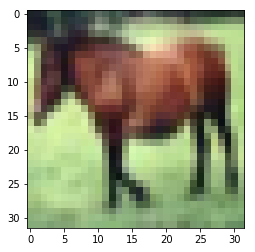

In [109]:
plt.imshow(processed_batch_1[7])

In [76]:
# test_reshape = batch_1_data.reshape(10000, 3, 1024)

In [77]:
# test_reshape.shape

(10000, 3, 1024)

In [80]:
# transposes the 2nd and 3rd dim
# test_reshape = test_reshape.transpose((0, 2, 1))

In [81]:
# test_reshape.shape

(10000, 1024, 3)

In [83]:
# temp_test = test_reshape.reshape(10000, 32, 32, 3)

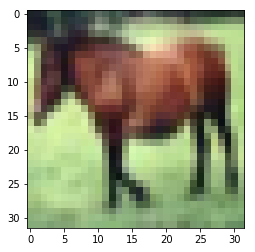

In [86]:
# plt.imshow(temp_test[7])

In [94]:
batch_2_dict = load_data('data_batch_2')

In [95]:
batch_2_data = batch_2_dict[b'data']

In [96]:
batch_2_labels = batch_2_dict[b'labels']

In [97]:
processed_batch_2 = process_batch(batch_2_data)

In [98]:
processed_batch_2.shape

(10000, 32, 32, 3)

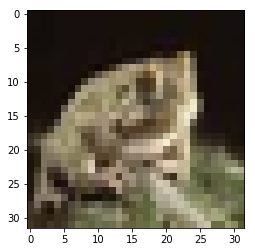

In [100]:
plt.imshow(processed_batch_2[1])

In [110]:
processed_batch_1.shape

(10000, 32, 32, 3)

In [111]:
processed_batch_2.shape

(10000, 32, 32, 3)

In [114]:
test_concat_data = np.concatenate((processed_batch_1, processed_batch_2), axis=0)

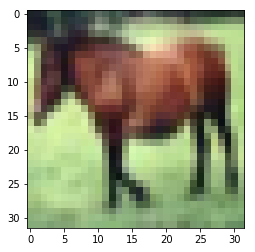

In [115]:
plt.imshow(test_concat_data[7])

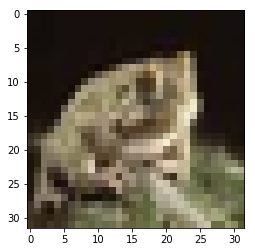

In [117]:
plt.imshow(test_concat_data[10001])

### Load and concat all 5 batches of training data

In [121]:
for i in range(1, 6):
    print(i)

1
2
3
4
5


In [124]:
data_batch_list = []
label_batch_list = []
for i in range(1, 6):
    current_batch = load_data('data_batch_' + str(i))
    current_data = current_batch[b'data']
    current_label = current_batch[b'labels']
    current_data = process_batch(current_data)
    data_batch_list.append(current_data)
    label_batch_list = label_batch_list + current_label

In [125]:
len(data_batch_list)

5

In [126]:
data_batch_list[0].shape

(10000, 32, 32, 3)

In [127]:
training_data = np.concatenate(data_batch_list, axis=0)

In [128]:
training_data.shape

(50000, 32, 32, 3)

In [129]:
len(label_batch_list)

50000

In [133]:
training_label = np.zeros((training_data.shape[0], num_classes))

In [134]:
training_label.shape

(50000, 10)

In [135]:
for i in range(50000):
    true_label = label_batch_list[i]
    training_label[i][true_label] += 1

In [143]:
# one hot vector for labels
training_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [152]:
training_label.shape

(50000, 10)

In [179]:
tf.reset_default_graph()

In [180]:
# build model

x = tf.placeholder(tf.float32, shape=[None, image_height, image_width, num_channels], name='x')

y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

conv1 = tf.layers.conv2d(inputs=x, filters=32, kernel_size=[5, 5], activation='relu', padding='same', strides=[2, 2], name='conv_layer_1')

conv1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2, name='max_pool_1')

# conv1 = tf.layers.batch_normalization(inputs=conv1, name='batch_norm_1')

conv2 = tf.layers.conv2d(inputs=conv1, filters=64, kernel_size=[5, 5], activation='relu', padding='same', strides=1, name='conv_layer_2')

conv2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2, name='max_pool_2')

flat1 = tf.layers.flatten(inputs=conv2)

dense1 = tf.layers.dense(inputs=flat1, units=1024, activation='relu', name='dense_layer_1')

dropout1 = tf.layers.dropout(inputs=dense1, rate=0.4, name='dropout_layer_1')

dense2 = tf.layers.dense(inputs=dropout1, units=10, activation='softmax', name='softmax_output_layer')

In [181]:
y_pred = dense2

In [182]:
y_pred_cls = tf.argmax(y_pred, axis=1)

In [183]:
cost_function = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=dense2)

In [184]:
cost = tf.reduce_mean(cost_function)

In [185]:
optimizer = tf.train.AdamOptimizer()

In [186]:
train = optimizer.minimize(cost)

In [187]:
correct_prediction = tf.equal(y_pred_cls, tf.argmax(y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [188]:
session = tf.Session()

In [189]:
session.run(tf.global_variables_initializer())

In [ ]:
# training


#### Setting some training variables

In [196]:
batch_size = 64

In [222]:
# use tf.data to create input iterator
tf_input_data = tf.data.Dataset.from_tensor_slices((training_data, training_label))
tf_input_data = tf_input_data.batch(batch_size)

In [223]:
ite = tf_input_data.make_one_shot_iterator()
element = ite.get_next()

In [224]:
with tf.Session() as sess:
    temp = sess.run(element)
    print(temp)

(array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
       

In [225]:
temp[0].shape

(64, 32, 32, 3)

In [226]:
temp[1].shape

(64, 10)

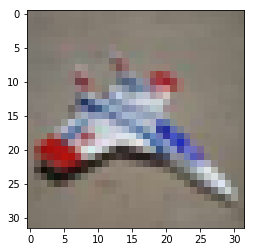

In [228]:
plt.imshow(temp[0][30])

In [229]:
current_cls = np.argmax(temp[1][30])

In [230]:
label_name_list[current_cls]

b'airplane'